In [1]:
import torch
import numpy
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

import sys
sys.path.insert(0,'/home/gsoc0/Adversarial_CapsNet_Pytorch/')
from model.net import *
from utils.training import *
from data.data import *

## Experiment Config

In [6]:
base_path = '/home/gsoc0/Adversarial_CapsNet_Pytorch/'
model_path = os.path.join(base_path, "weights")

args = {
    'DATASET_NAME':'mnist',
    'num_classes':10,
    
    
    'USE_CUDA': True if torch.cuda.is_available() else False,
    'BATCH_SIZE': 256,
    'N_EPOCHS': 30,
    'LEARNING_RATE_1': 1e-4,
    'LEARNING_RATE_2': 1e-4,
    'WEIGHTDECAY':5e-6,
    
    #Scheduler
    'USE_SCHEDULER':True,
    'sched_milestones':[8,20,30,40,50],
    'sched_gamma':0.1,
    
    #Loss Function
    'LAMBDA_recon': 1,
    'LAMBDA_class': 1,
    
    #For Decoder'
    'num_features':160,
    'LReLU_negative_slope':0.1,
    'input_height':28,
    'input_width':28,
    'input_channel':1,
    'type':'CapsNet',
    
}

#Setting Default Cuda Device
torch.cuda.set_device(0)

## Model Loading

In [3]:
# Config for 16 1d vectors in Capsule Layer. Set the Softmax Dimension to 1 in this case
class Config:
    def __init__(self, dataset='mnist'):
        # CNN (cnn)
        self.cnn_in_channels = 1
        self.cnn_out_channels = 12
        self.cnn_kernel_size = 15

        # Primary Capsule (pc)
        self.pc_num_capsules = 1
        self.pc_in_channels = 12
        self.pc_out_channels = 16
        self.pc_kernel_size = 8
        self.pc_num_routes = 1 * 7 * 7

        # Digit Capsule 1 (dc)
        self.dc_num_capsules = 49
        self.dc_num_routes = 7 * 7 #7*7*16
        self.dc_in_channels = 16
        self.dc_out_channels = 16 #1
        
        # Digit Capsule 2 (dc)
        self.dc_2_num_capsules = 10
        self.dc_2_num_routes = 7 * 7
        self.dc_2_in_channels = 16 #1
        self.dc_2_out_channels = 16


torch.manual_seed(2)
config = Config()
net = CapsNet(args, config)
# net = torch.nn.DataParallel(net)
net.load_state_dict(torch.load(os.path.join(model_path, 'CapsNet_mnist.pth'), map_location='cpu'))
    
if args['USE_CUDA']:
    net = net.cuda()
    

## Loading Dataset

In [4]:
dataloader = {}
dataloader['train'], dataloader['val'] = dataset(args)

## Training CapsuleNet

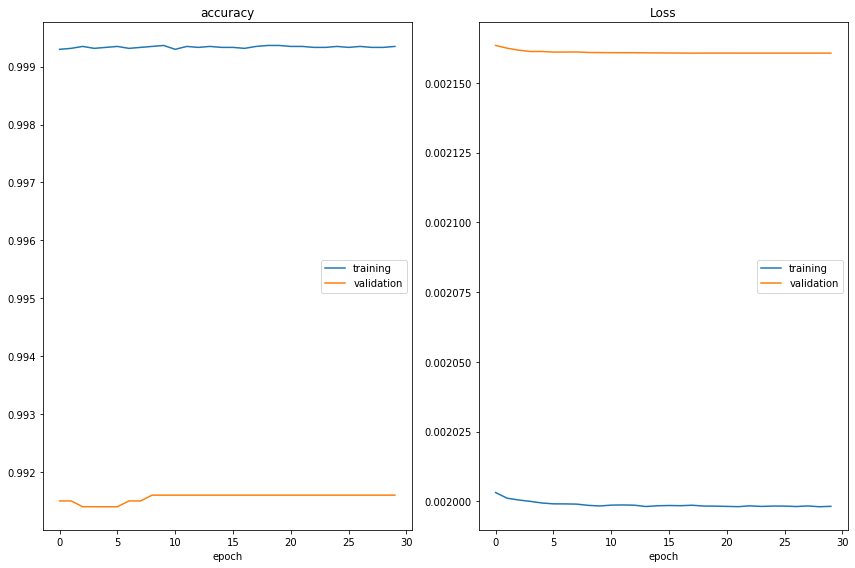

accuracy
	training         	 (min:    0.999, max:    0.999, cur:    0.999)
	validation       	 (min:    0.991, max:    0.992, cur:    0.992)
Loss
	training         	 (min:    0.002, max:    0.002, cur:    0.002)
	validation       	 (min:    0.002, max:    0.002, cur:    0.002)


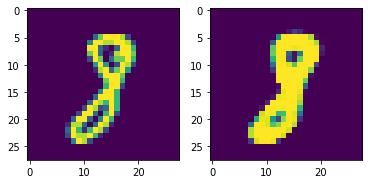

Weights of Reconstruction Layer: tensor([ 5.6955e-12,  7.6133e-12, -5.2712e-13], device='cuda:0',
       grad_fn=<AsStridedBackward>)
Grads of Reconstruction Layer: tensor([-4.8059e-16,  1.7479e-16, -1.5900e-16], device='cuda:0')


In [7]:
optimizer = torch.optim.Adam([
                {'params':net.decoder.parameters(), 'lr':args['LEARNING_RATE_2'], 'weight_decay':args['WEIGHTDECAY']},
                {'params': net.conv_layer.parameters()},
                {'params': net.primary_capsules.parameters()},
                {'params': net.digit_capsules_1.parameters()},
                {'params': net.digit_capsules_2.parameters()},
            ], lr=args['LEARNING_RATE_1'])

train_clean(net, optimizer, dataloader, args)

In [ ]:
torch.save(net.state_dict(), os.path.join(model_path, "./CapsNetMNIST_Recon_model2_iter2.pth"))